In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [2]:
# Set the seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [3]:
# Define constants
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32
EPOCHS = 20

In [4]:
# Load the data
data_dir = "C:/Users/karat/Downloads/brain_tumors/brain_tumors"
class_names = os.listdir(data_dir)
num_classes = len(class_names)

In [5]:
# Prepare the dataset
data = []
labels = []
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img = tf.keras.preprocessing.image.load_img(os.path.join(class_dir, img_name), target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        data.append(img_array)
        labels.append(i)

data = np.array(data)
labels = np.array(labels)

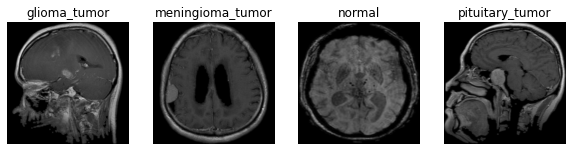

In [6]:
# Plot sample images from each class
plt.figure(figsize=(10, 10))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_dir)
    sample_image = random.choice(image_files)
    sample_image_path = os.path.join(class_dir, sample_image)
    img = plt.imread(sample_image_path)
    plt.subplot(1, num_classes, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.show()

In [7]:
# Print the number of images in each class
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_dir))
    print(f"Number of images in {class_name}: {num_images}")

Number of images in glioma_tumor: 901
Number of images in meningioma_tumor: 913
Number of images in normal: 438
Number of images in pituitary_tumor: 844


In [8]:
# Split the data into training, validation, and testing sets while maintaining class proportions
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [9]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [10]:
# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test))

Epoch 1/20
62/62 [==============================] - 21s 229ms/step - loss: 1.2670 - accuracy: 0.4207 - val_loss: 1.0178 - val_accuracy: 0.5500
Epoch 2/20
62/62 [==============================] - 14s 225ms/step - loss: 0.8675 - accuracy: 0.6343 - val_loss: 0.8008 - val_accuracy: 0.7242
Epoch 3/20
62/62 [==============================] - 14s 223ms/step - loss: 0.6052 - accuracy: 0.7692 - val_loss: 0.7671 - val_accuracy: 0.7339
Epoch 4/20
62/62 [==============================] - 14s 223ms/step - loss: 0.4941 - accuracy: 0.8182 - val_loss: 0.6659 - val_accuracy: 0.7661
Epoch 5/20
62/62 [==============================] - 14s 229ms/step - loss: 0.2719 - accuracy: 0.9101 - val_loss: 0.6958 - val_accuracy: 0.7790
Epoch 6/20
62/62 [==============================] - 14s 223ms/step - loss: 0.1434 - accuracy: 0.9505 - val_loss: 0.7259 - val_accuracy: 0.7984
Epoch 7/20
62/62 [==============================] - 14s 223ms/step - loss: 0.0894 - accuracy: 0.9722 - val_loss: 0.8463 - val_accuracy: 0.7919

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

20/20 [==============================] - 1s 43ms/step - loss: 1.0698 - accuracy: 0.8355
Test accuracy: 0.8354838490486145


In [14]:
# Training accuracy
train_loss, train_acc = model.evaluate(x_train, y_train)
print(f'Training accuracy: {train_acc}')

62/62 [==============================] - 3s 44ms/step - loss: 0.0070 - accuracy: 0.9990
Training accuracy: 0.9989898800849915


In [15]:
# Validation accuracy
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Validation accuracy: {val_acc}')

16/16 [==============================] - 1s 43ms/step - loss: 1.1003 - accuracy: 0.8266
Validation accuracy: 0.8266128897666931


In [16]:
# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

20/20 [==============================] - 1s 42ms/step


In [17]:
# Classification report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       180
           1       0.80      0.77      0.78       183
           2       0.84      0.84      0.84        88
           3       0.87      0.93      0.90       169

    accuracy                           0.84       620
   macro avg       0.84      0.84      0.84       620
weighted avg       0.83      0.84      0.83       620



In [18]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[146  19   7   8]
 [ 25 140   6  12]
 [  1  10  74   3]
 [  5   5   1 158]]


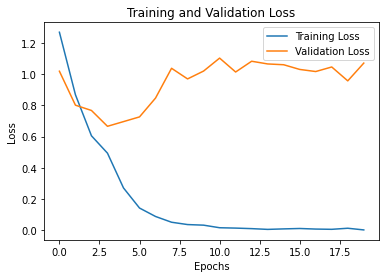

In [19]:
# Loss curve
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [20]:
# Select five random indices from the test set
random_indices = np.random.choice(len(x_test), 5, replace=False)

In [21]:
# Get the actual and predicted classes for the selected indices
actual_classes = y_test[random_indices]
predicted_classes = y_pred_classes[random_indices]

In [22]:
# Define class labels
class_labels = ["glioma_tumor", "meningioma_tumor", "normal", "pituitary_tumor"]

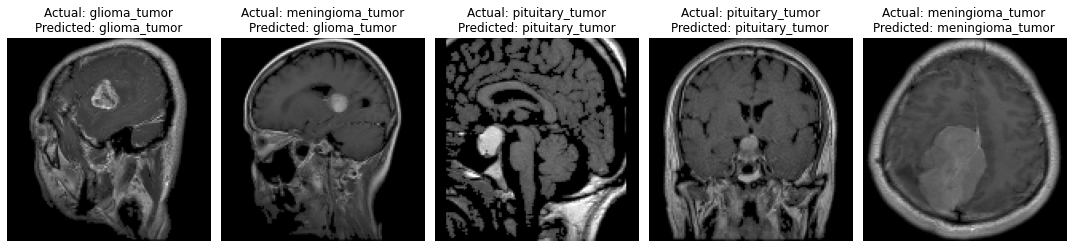

In [23]:
# Plot the images with their actual and predicted classes
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])  # Assuming x_test contains the images
    plt.title(f"Actual: {class_labels[actual_classes[i]]}\nPredicted: {class_labels[predicted_classes[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Unsupervised Learning 

In [10]:
import numpy as np
from numpy import zeros, ones, expand_dims, asarray
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, InputLayer,LeakyReLU, BatchNormalization
from tensorflow.keras.layers import Conv2D,Conv2DTranspose, Reshape, MaxPooling2D, Input, ReLU
import keras
from keras.initializers import RandomNormal
from keras.optimizers import Adam, RMSprop, SGD


In [83]:
def get_generator(latent_dim):
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    generator = Sequential()

    generator.add(Input(shape=(latent_dim,)))
    
    generator.add(Dense(16 * 16 * 512))
    generator.add(Reshape((16, 16, 512)))

    #16x16xx512 -> 32x32x256
    generator.add(Conv2DTranspose(256, kernel_size=(3, 3), strides=(2, 2), padding='same',kernel_initializer=initializer, use_bias=False))
    generator.add(BatchNormalization(momentum=0.8, epsilon=0.8, center=1.0))
    generator.add(ReLU())
    
    # 32x32x256 -> 64x64x128
    generator.add(Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same',kernel_initializer=initializer, use_bias=False))
    generator.add(BatchNormalization(momentum=0.8, epsilon=0.8, center=1.0))
    generator.add(ReLU())

    # 64x64x128 -> 128x128x64
    generator.add(Conv2DTranspose(64, kernel_size=(3, 3), strides=(2, 2), padding='same',kernel_initializer=initializer, use_bias=False))
    generator.add(BatchNormalization(momentum=0.8, epsilon=0.8, center=1.0))
    generator.add(ReLU())

    # 128x128x64 -> 128x128x3
    generator.add(Conv2D(3, kernel_size=(3, 3), strides=(1, 1), padding='same',kernel_initializer=initializer, use_bias=False, activation='tanh'))

    return generator

In [89]:
def get_discriminator():
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    discriminator = Sequential()

    discriminator.add(Input(shape=(128, 128, 3)))

    # 128*128*3 -> 64*64*64
    discriminator.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding="same",kernel_initializer=initializer, use_bias=False))
    discriminator.add(BatchNormalization(momentum=0.8, epsilon=0.8, center=1.0))
    discriminator.add(LeakyReLU(0.5))

    # 64x64x64 -> 32x32x128
    discriminator.add(Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding="same",kernel_initializer=initializer, use_bias=False))
    discriminator.add(BatchNormalization(momentum=0.8, epsilon=0.8, center=1.0))
    discriminator.add(LeakyReLU(0.5))

    # 32x32x128 -> 16x16x256
    discriminator.add(Conv2D(256, kernel_size=(3, 3), strides=(2, 2), padding="same",kernel_initializer=initializer, use_bias=False))
    discriminator.add(BatchNormalization(momentum=0.8, epsilon=0.8, center=1.0))
    discriminator.add(LeakyReLU(0.5))

    #16x16x256 -> 16x16x512
    discriminator.add(Conv2D(512, kernel_size=(3, 3), strides=(2, 2), padding="same",kernel_initializer=initializer, use_bias=False))
    discriminator.add(BatchNormalization(momentum=0.8, epsilon=0.8, center=1.0))
    discriminator.add(LeakyReLU(0.5))

    discriminator.add(Flatten())
    discriminator.add(Dense(1, activation='sigmoid'))

    return discriminator 

In [90]:
discriminator = get_discriminator()

latent_dim = 100
generator = get_generator(latent_dim)

#generator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

discriminator.summary()
generator.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 64, 64, 64)        1728      
                                                                 
 batch_normalization_98 (Ba  (None, 64, 64, 64)        256       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 64, 64, 64)        0         
                                                                 
 conv2d_71 (Conv2D)          (None, 32, 32, 128)       73728     
                                                                 
 batch_normalization_99 (Ba  (None, 32, 32, 128)       512       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 32, 32, 128)     

In [91]:
def generate_discriminate(images):

    idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
    imgs = x_train[idx]
    
    valid = np.ones((BATCH_SIZE,1))
    fake = np.zeros((BATCH_SIZE,1))

    noise = np.random.normal(0,1,(BATCH_SIZE, latent_dim))
    generate_imgs = generator.predict(noise)
    fake_output = discriminator(generate_imgs, training=True)

    real_output = discriminator(images)

    binary_cross_entropy = tf.keras.losses.BinaryCrossentropy()

    real_loss = discriminator.train_on_batch(imgs, valid)
    fake_loss = discriminator.train_on_batch(generate_imgs, fake)
    discriminator_loss = 0.5 * np.add(real_loss, fake_loss)
    
    z= Input(shape=(latent_dim))
    img = generator(z)

    valid_2 = discriminator(img)

    combined = Model(z, valid_2)
    combined.compile(loss='binary_crossentropy', optimizer='adam')

    generator_loss = combined.train_on_batch(noise, valid)
    
    r,c = 5, 5
    noise = np.random.normal(0,1,(r*c, latent_dim))
    generate_images = 0.2 * generate_imgs + 0.2
    fig, axs = plt.subplots(r,c)
    cnt = 0
    for i in range(r):
        for j in range(c):    
            plt.imshow(generate_imgs[cnt,:,:,0], cmap='gray')
            plt.axis('off')
            cnt += 1
        plt.show()    
    plt.close()

In [92]:
def train(epochs, batch_size=BATCH_SIZE):
    for epoch in range(epochs):
        print(epoch)
        generate_discriminate(x_train)

0
1/1 [==============================] - 0s 482ms/step


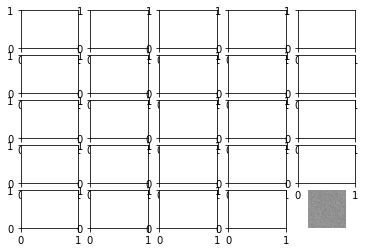

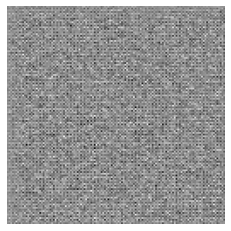

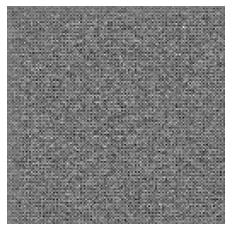

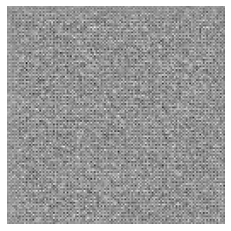

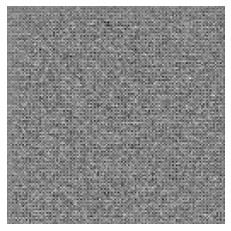

1
1/1 [==============================] - 0s 405ms/step


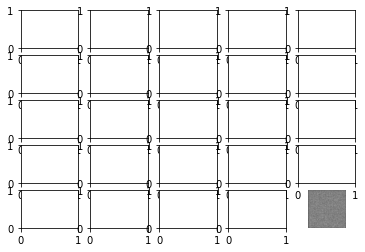

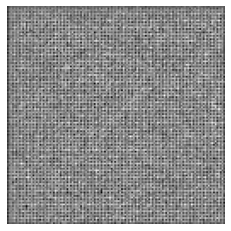

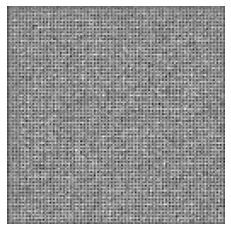

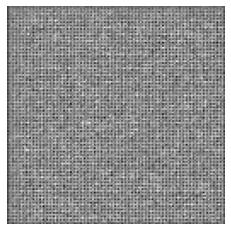

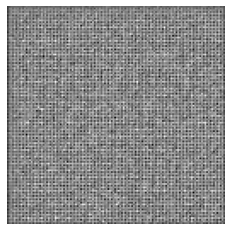

2
1/1 [==============================] - 0s 405ms/step


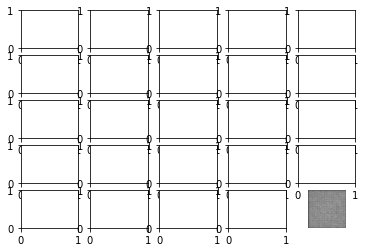

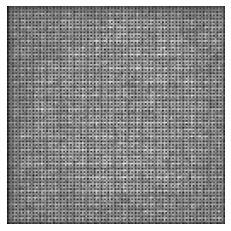

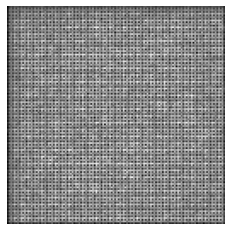

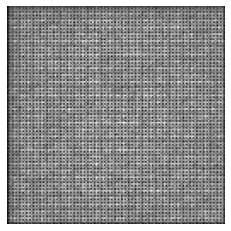

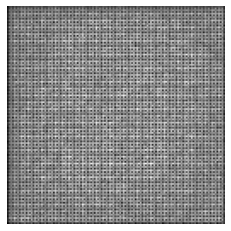

3
1/1 [==============================] - 0s 403ms/step


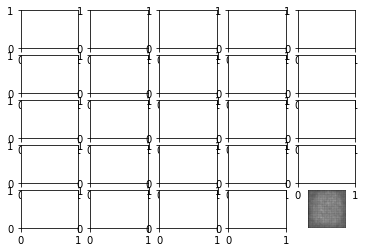

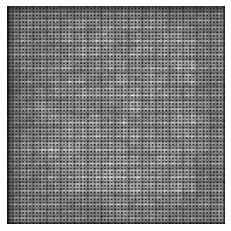

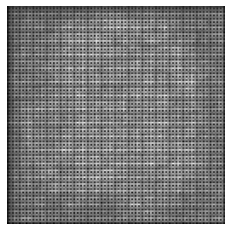

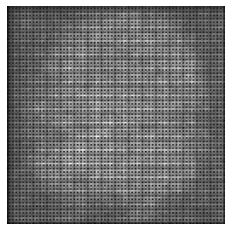

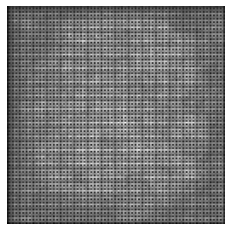

4
1/1 [==============================] - 0s 399ms/step


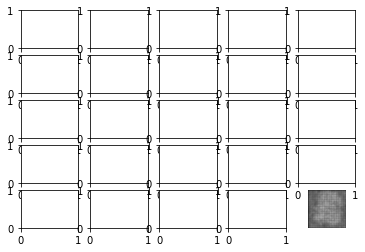

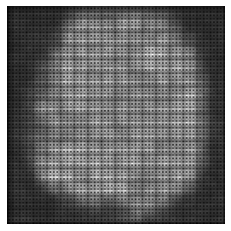

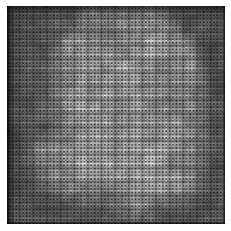

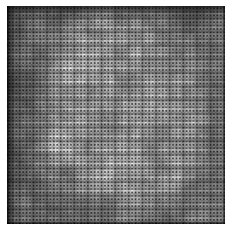

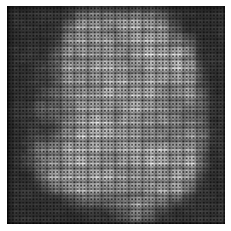

5
1/1 [==============================] - 0s 421ms/step


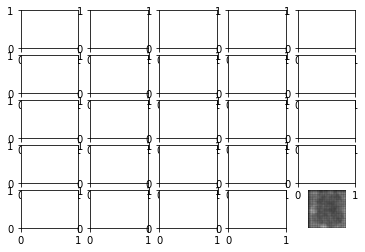

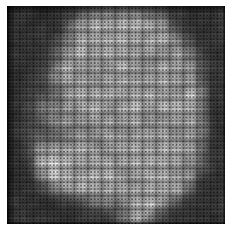

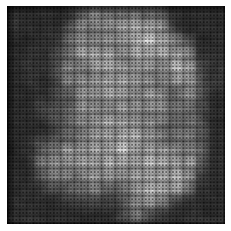

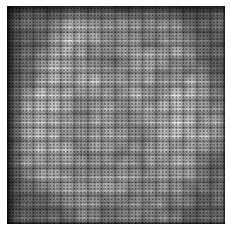

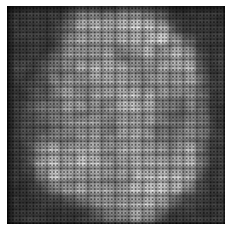

6
1/1 [==============================] - 0s 411ms/step


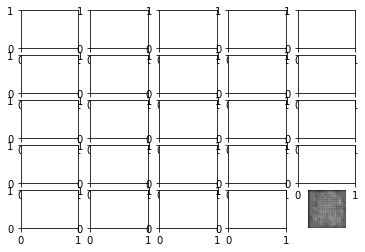

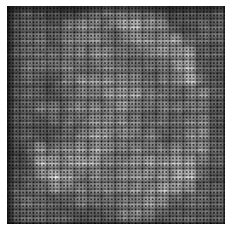

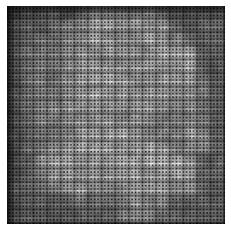

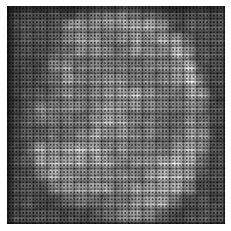

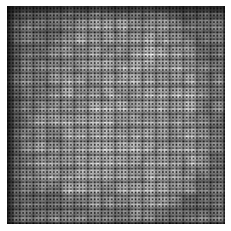

7
1/1 [==============================] - 0s 398ms/step


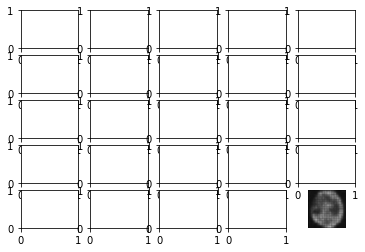

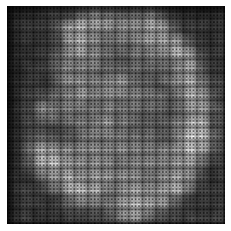

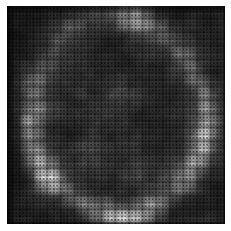

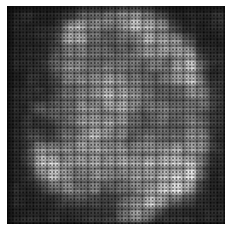

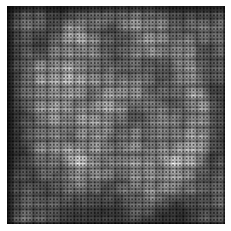

8
1/1 [==============================] - 0s 393ms/step


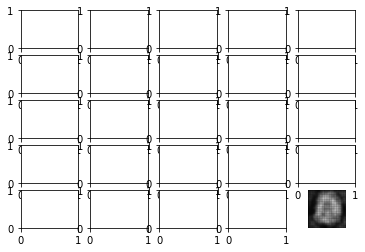

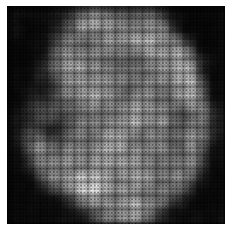

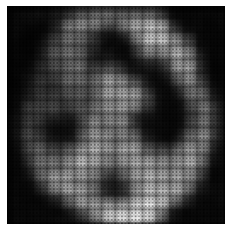

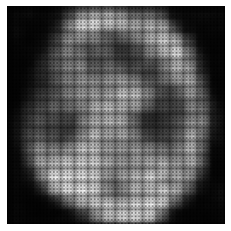

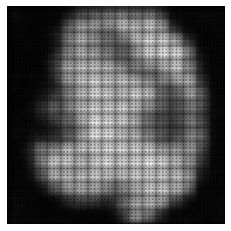

9
1/1 [==============================] - 0s 396ms/step


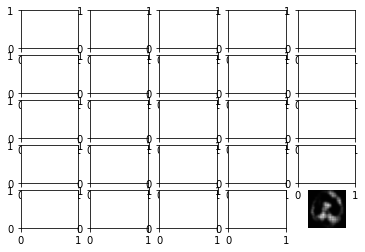

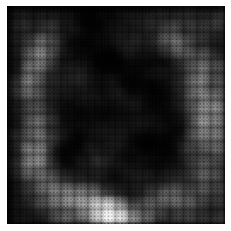

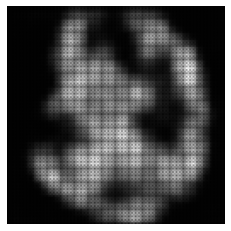

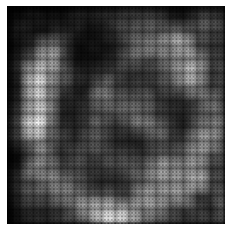

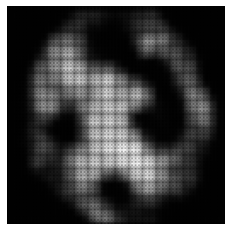

10
1/1 [==============================] - 0s 408ms/step


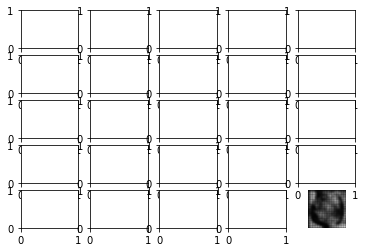

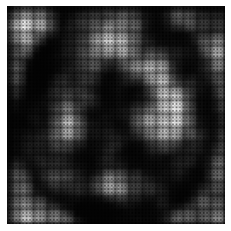

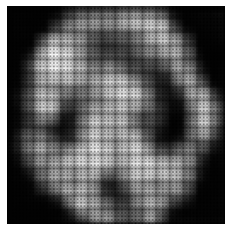

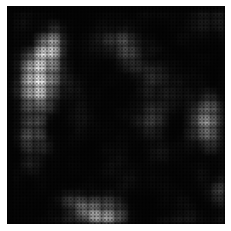

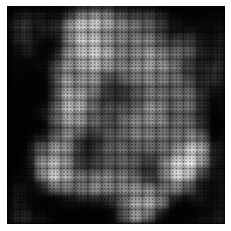

11
1/1 [==============================] - 0s 400ms/step


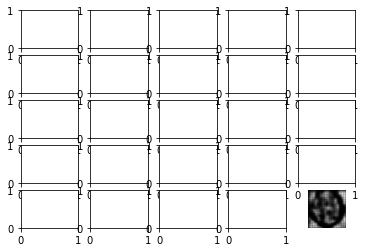

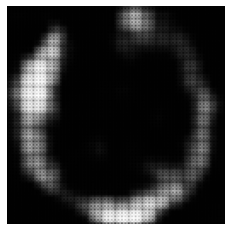

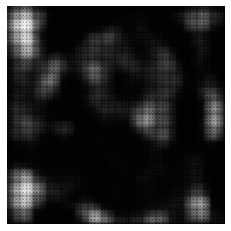

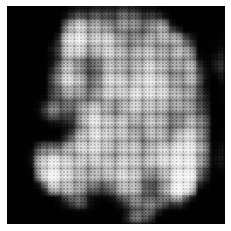

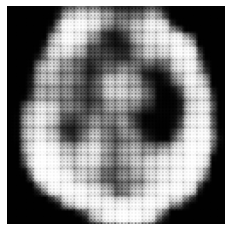

12
1/1 [==============================] - 0s 399ms/step


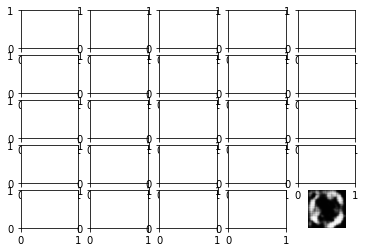

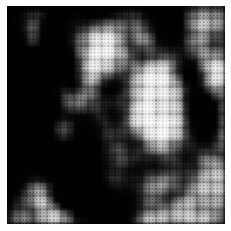

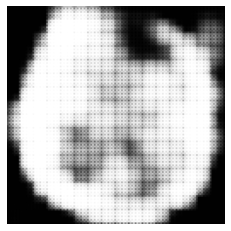

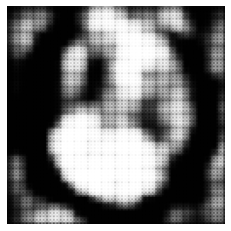

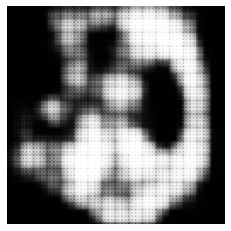

13
1/1 [==============================] - 0s 386ms/step


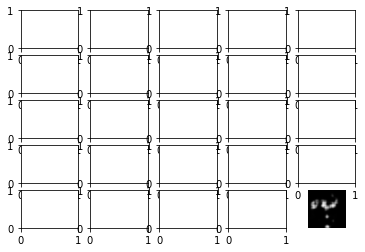

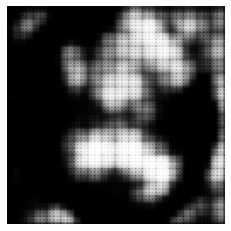

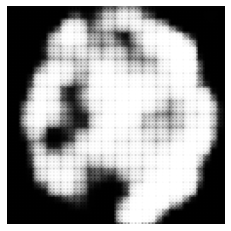

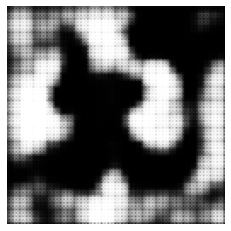

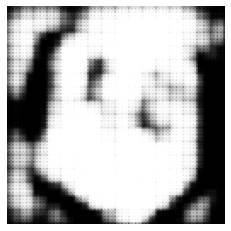

14
1/1 [==============================] - 0s 408ms/step


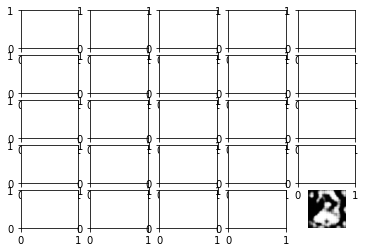

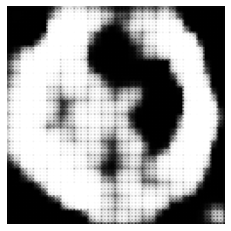

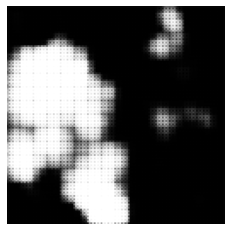

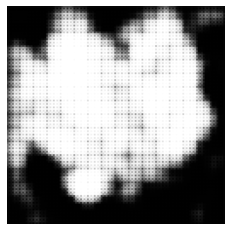

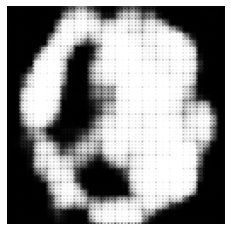

15
1/1 [==============================] - 0s 412ms/step


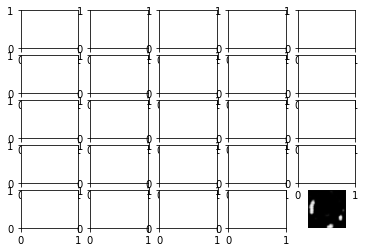

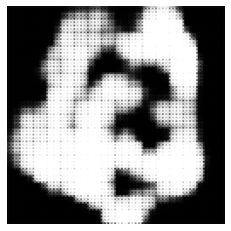

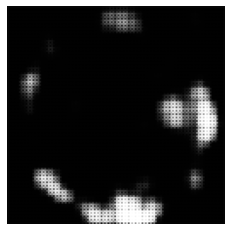

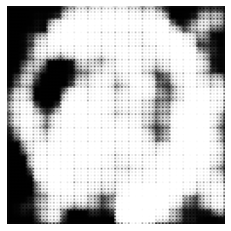

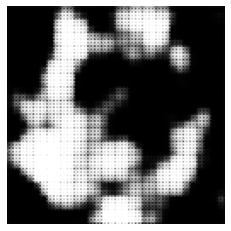

16
1/1 [==============================] - 0s 397ms/step


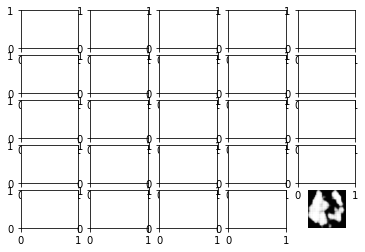

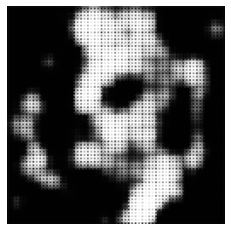

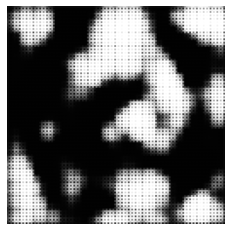

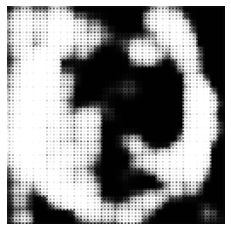

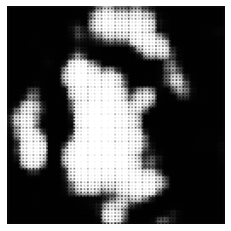

17
1/1 [==============================] - 0s 416ms/step


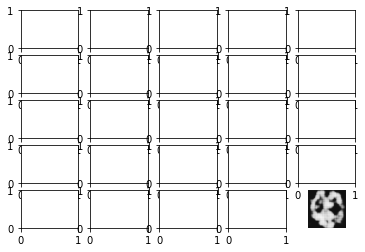

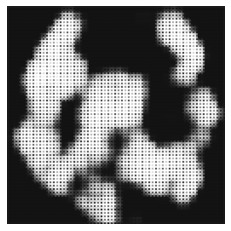

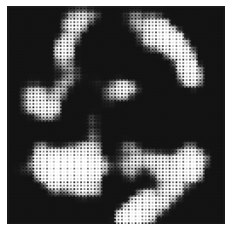

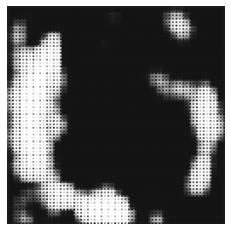

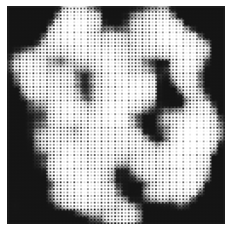

18
1/1 [==============================] - 0s 412ms/step


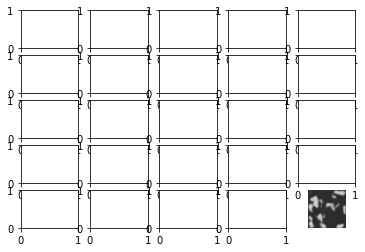

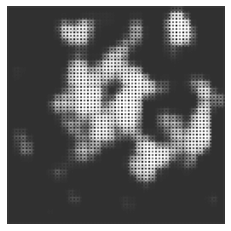

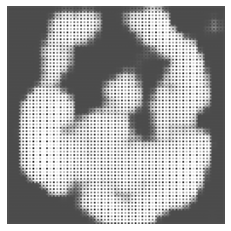

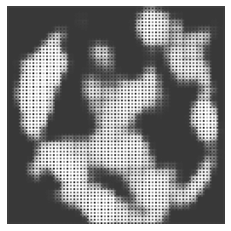

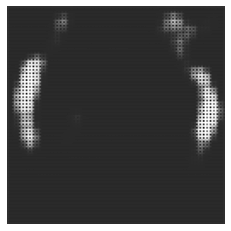

19
1/1 [==============================] - 0s 397ms/step


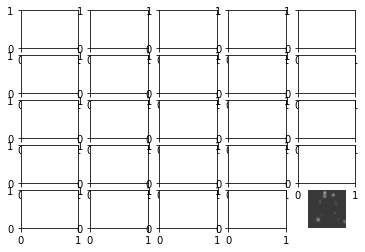

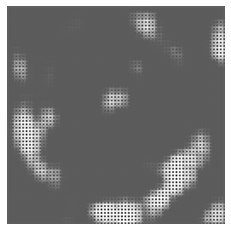

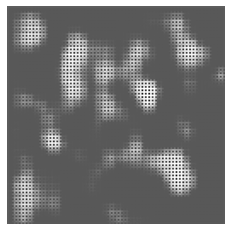

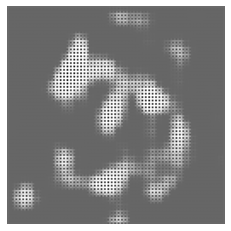

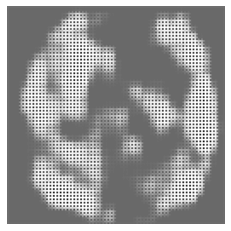

In [93]:
train(20)